# Simple linear regression
    - Obtain time series data for T and O2
    - Perform simple linear regression with time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# it needs a package called openpyxl
from sklearn import linear_model

In [2]:
df=pd.read_excel('https://o2.eas.gatech.edu/Itoetal_GRL_2017/Itoetal_GRL_Fig1.xlsx',\
                skiprows=3)

In [3]:
#df

In [4]:
year = df['YEAR'][1:].to_numpy()
o2=df['Unnamed: 5'][1:].to_numpy() # in 10^14 mol
T=df['Unnamed: 10'][1:].to_numpy() # in 10^22 J

Text(0, 0.5, '0-1000m O2 inventory anomaly, 10**14 mol')

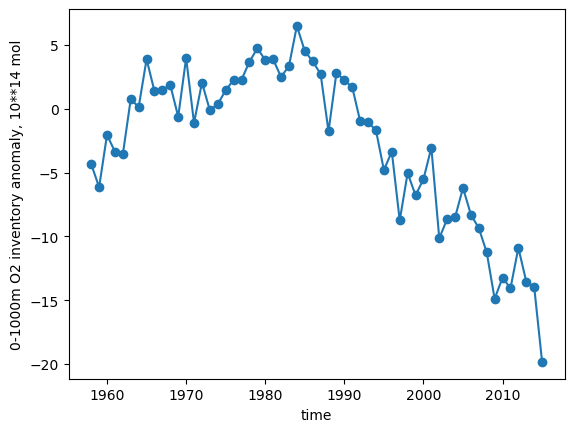

In [5]:
plt.plot(year,o2,'o-')
plt.xlabel('time')
plt.ylabel('0-1000m O2 inventory anomaly, 10**14 mol')

In [6]:
# simple linear regression
# y = ax + b
# x:year
# y:o2
a = (np.mean(year*o2)-np.mean(year)*np.mean(o2))/(np.mean(year*year)-np.mean(year)**2)
b = np.mean(o2)-a*np.mean(year)
print(a,b)

-0.2545011806182949 502.83461816617387


Text(1960, -15, 'R$^2$ = 0.48')

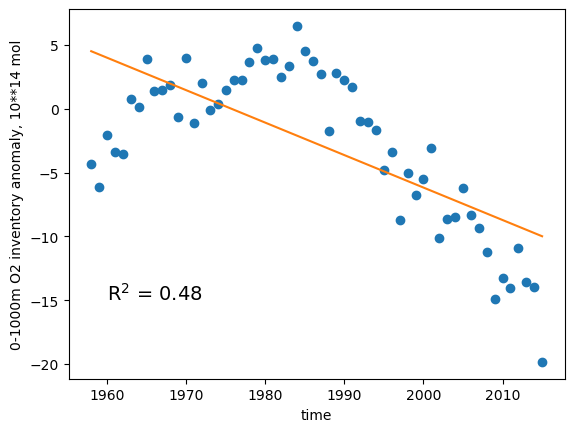

In [7]:
# plot with line fit
plt.plot(year,o2,'o')
plt.plot(year,a*year+b,'-')
plt.xlabel('time')
plt.ylabel('0-1000m O2 inventory anomaly, 10**14 mol')
# calculate R2
r2 = a**2*np.var(year)/np.var(o2)
plt.text(1960,-15,'R$^2$ = '+str(np.round(r2,2)),fontsize=14)

Text(0.5, 0, 'slope, regr coeff')

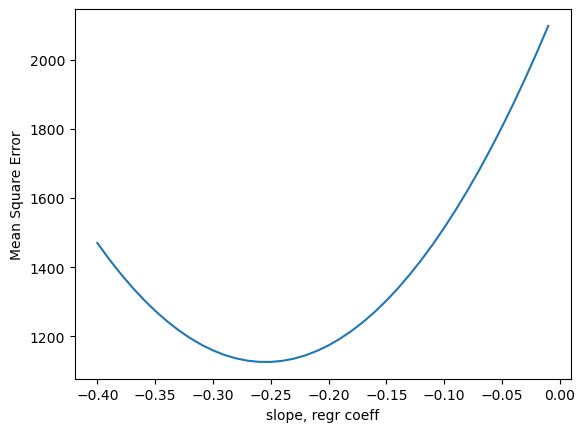

In [8]:
# Minimizing the cost function or mean square error
# sweep the range of a from 0.1 to 0.4
A = np.arange(-0.4,0,0.01)
N = np.size(A)
Nt= np.size(year)
MSE=np.zeros(N)
#
for n in range(N):
    B = np.mean(o2)-A[n]*np.mean(year)
    o2est = A[n]*year + B
    MSE[n] = np.sum((o2est - o2)**2)
#
plt.plot(A,MSE)
plt.ylabel('Mean Square Error')
plt.xlabel('slope, regr coeff')

In [9]:
# Use scikit-learn to do the same thing
reg = linear_model.LinearRegression()
X = np.ones((Nt,2))
X[:,0]=year
reg.fit(X,o2)

LinearRegression()

Text(0, 0.5, '0-1000m O2 inventory anomaly, 10**14 mol')

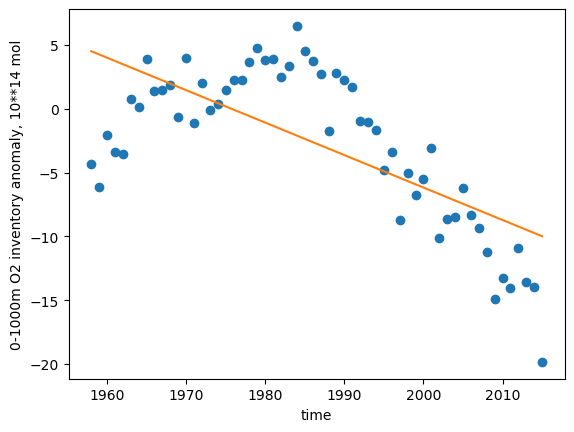

In [10]:
o2est=reg.predict(X)
#
plt.plot(year,o2,'o')
plt.plot(year,o2est,'-')
plt.xlabel('time')
plt.ylabel('0-1000m O2 inventory anomaly, 10**14 mol')

In [11]:
# Get the R2 value
reg.score(X,o2)

0.4832313051541667